In [1]:
from qiskit.pulse import Schedule, Gaussian, GaussianSquare, Drag, Play, DriveChannel, ShiftPhase, ShiftFrequency
from qiskit.visualization.pulse.qcstyle import SchedStyle
from qiskit_ode.converters import InstructionToSignals

style = SchedStyle(figsize=(16, 5))

In [2]:
sched = Schedule(name='Schedule')
sched += Play(Drag(duration=20, amp=0.5, sigma=4, beta=0.5), DriveChannel(0))
sched += ShiftPhase(1.0, DriveChannel(0))
sched += Play(Drag(duration=20, amp=0.5, sigma=4, beta=0.5), DriveChannel(0))
sched += ShiftFrequency(0.5, DriveChannel(0))
sched += Play(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150), DriveChannel(0))
sched = sched.insert(0, Play(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150), DriveChannel(1)))

In [3]:
len(GaussianSquare(duration=200, amp=0.3, sigma=4, width=150).get_waveform().samples)

200

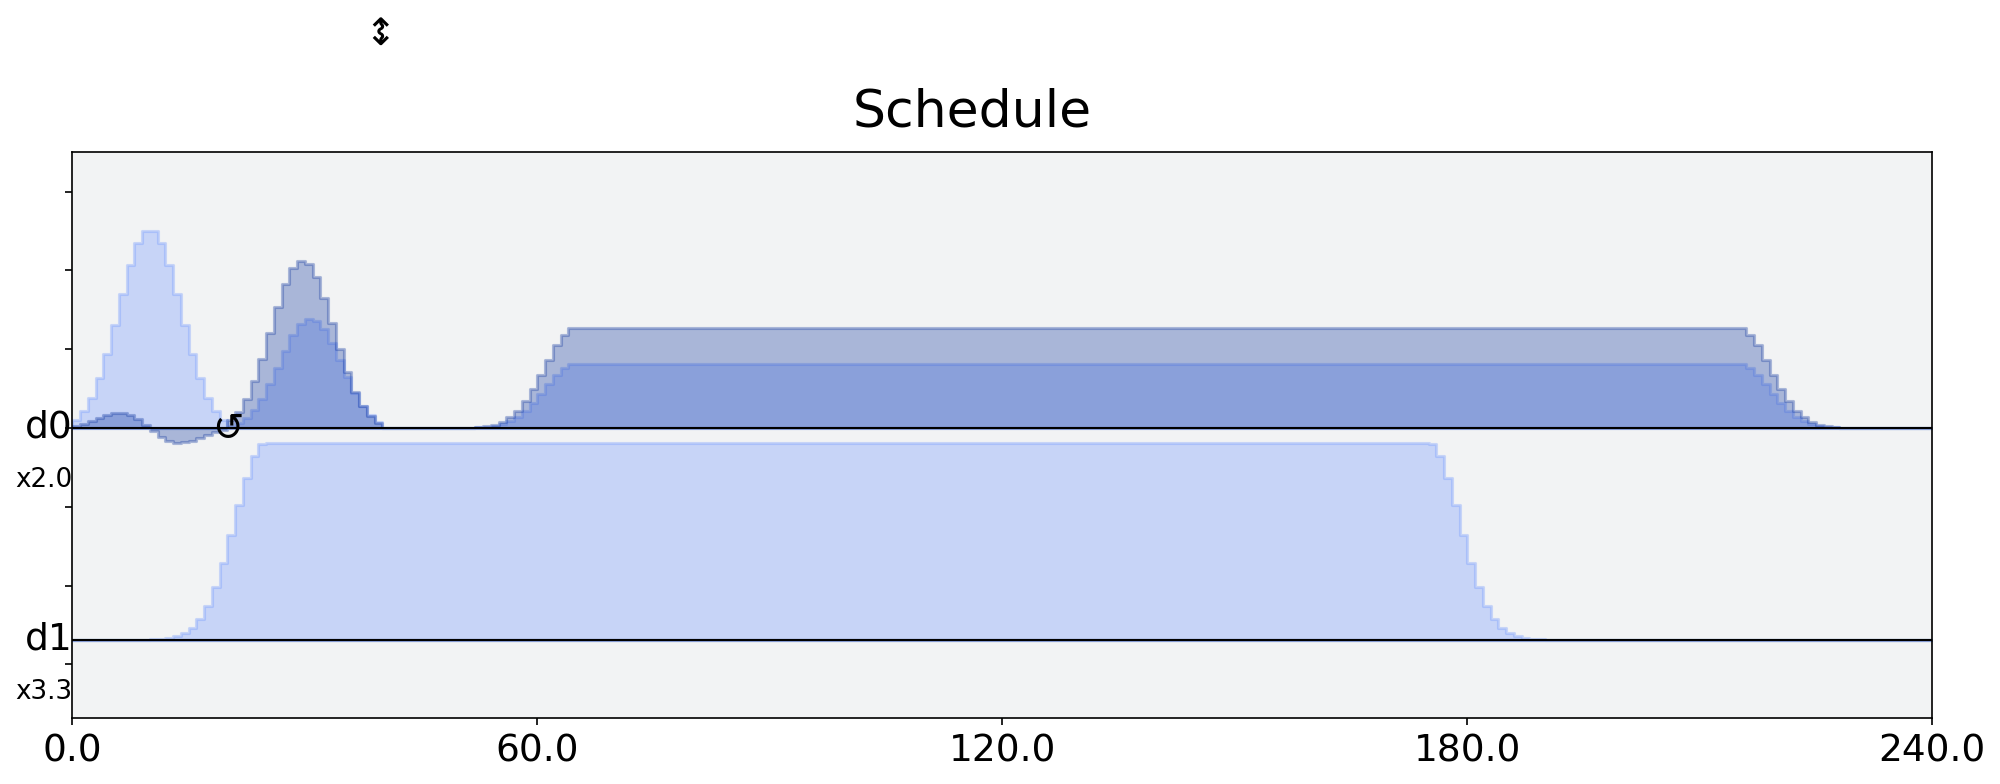

In [4]:
sched.draw(style=style)

In [5]:
converter = InstructionToSignals(dt=1, carriers=None)

In [6]:
converter.get_signals(sched)

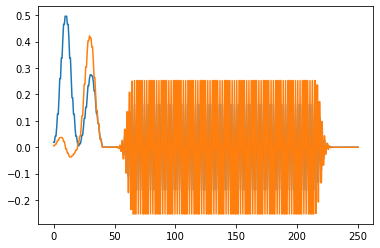

In [7]:
converter.get_signals(sched)[0].plot(0, 250, 400)

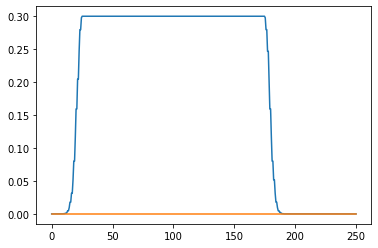

In [8]:
converter.get_signals(sched)[1].plot(0, 250, 400)